In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from dronehover.optimization import Hover
from dronehover.bodies.standard_bodies import Quadcopter
from simevo.phenotype import Phenotype

plt.style.use("../../custom.mplstyle")

In [3]:
# Load log files

load_path = "./Logs/run3"
if not os.path.exists(os.path.join(load_path, "pareto")):
    os.mkdir(os.path.join(load_path, "pareto"))
if not os.path.exists(os.path.join(load_path, "extrema")):
    os.mkdir(os.path.join(load_path, "extrema"))

FileNotFoundError: [Errno 2] No such file or directory: './Logs/run3/pareto'

In [1]:
# Load standard quadcopter for comparison

quadcopter = Quadcopter(0.110)
sim = Hover(quadcopter)
sim.compute_hover(verbose=False)
quad_alpha = sim.alpha
quad_ctrl = np.log10(min(sim.eig_m))
quad_size = 0.220*np.sin(np.pi/4) * 0.220*np.sin(np.pi/4) * 0.06 

NameError: name 'Quadcopter' is not defined

In [9]:
# Load data
objectives = pd.read_csv(os.path.join(load_path, "objectives", f"objectives{300}.csv"))
drones = np.load(os.path.join(load_path, "population", f"population{300}.npy"))
drones = drones.tolist()

objectives['drone'] = drones

objectives_optim = objectives[objectives["rank"]==1]

alpha = objectives[objectives["rank"]!=1]["alpha"]
size = objectives[objectives["rank"]!=1]["volume"]
ctrl = objectives[objectives["rank"]!=1]["ctrl"]
ctrl = np.log10(ctrl)

alpha_optim = objectives_optim["alpha"]
size_optim = objectives_optim["volume"]
ctrl_optim = objectives_optim["ctrl"]
ctrl_optim = np.log10(ctrl_optim)

print(max(alpha_optim))
print(min(size_optim))
print(max(ctrl_optim))

13.731564232665448
0.0014520000028379
7.3480515136925275


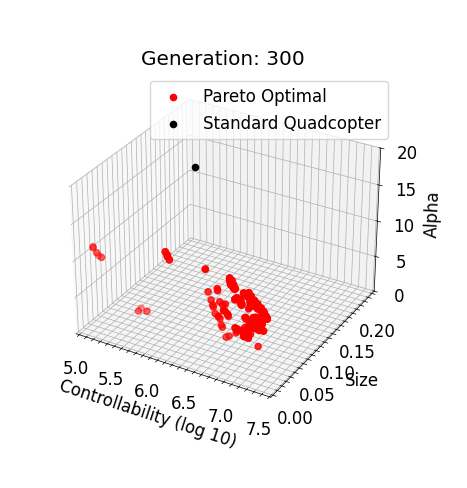

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(ctrl_optim, size_optim, alpha_optim, color='r', s=20)
ax.scatter(quad_ctrl, quad_size, quad_alpha, color='k', s=20)

ax.set_xlabel("Controllability (log 10)")
ax.set_ylabel("Size")
ax.set_zlabel("Alpha")

ax.set_zlim([0,20])

plt.title(f"Generation: {300}")

ax.scatter([], [], [], color="r", label="Pareto Optimal", s=20)
ax.scatter([], [], [], color="k", label="Standard Quadcopter", s=20)
plt.legend()

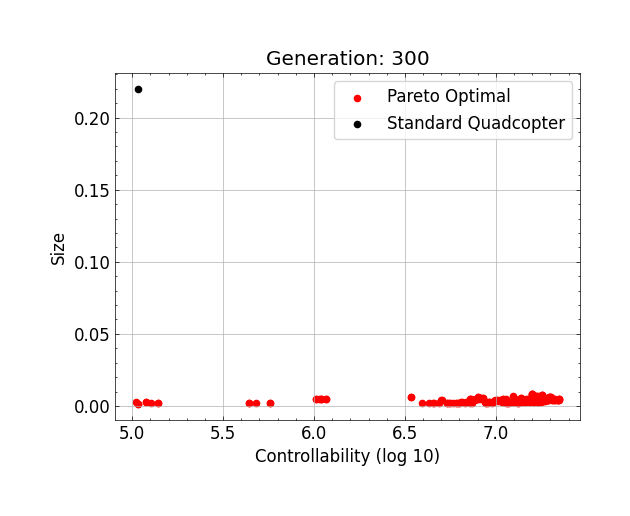

In [11]:
# Plot the controllability vs Size

plt.scatter(ctrl_optim, size_optim, color='r', s=20)
plt.scatter(quad_ctrl, quad_size, color='k', s=20)
plt.xlabel("Controllability (log 10)")
plt.ylabel("Size")

plt.title(f"Generation: {300}")

plt.scatter([], [], color="r", label="Pareto Optimal", s=20)
plt.scatter([], [], color="k", label="Standard Quadcopter", s=20)
plt.legend()

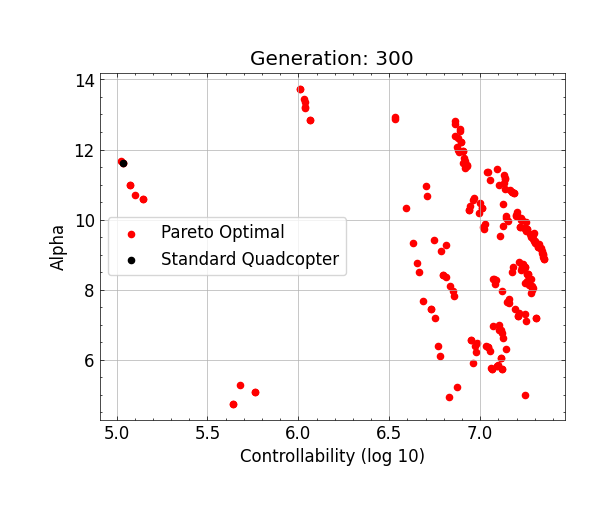

In [12]:
# Plot Controllability vs Alpha
plt.scatter(ctrl_optim, alpha_optim, color='r', s=20)
plt.scatter(quad_ctrl, quad_alpha, color='k', s=20)
plt.xlabel("Controllability (log 10)")
plt.ylabel("Alpha")

plt.title(f"Generation: {300}")

plt.scatter([], [], color="r", label="Pareto Optimal", s=20)
plt.scatter([], [], color="k", label="Standard Quadcopter", s=20)
plt.legend()

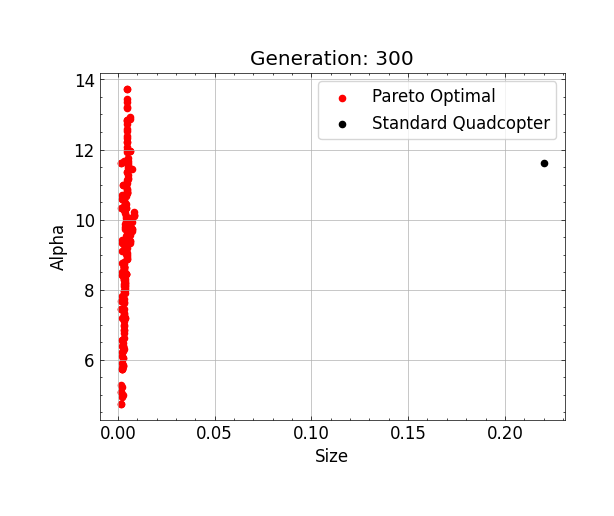

In [13]:
# Plot Size vs Alpha

plt.scatter(size_optim, alpha_optim, color='r', s=20)
plt.scatter(quad_size, quad_alpha, color='k', s=20)
plt.xlabel("Size")
plt.ylabel("Alpha")

plt.title(f"Generation: {300}")

plt.scatter([], [], color="r", label="Pareto Optimal", s=20)
plt.scatter([], [], color="k", label="Standard Quadcopter", s=20)
plt.legend(loc="best")

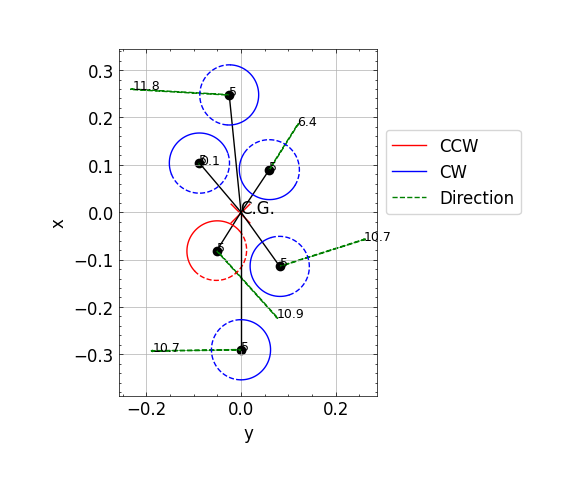

In [14]:
# Plot max alpha drone
alpha_max = objectives_optim.iloc[objectives_optim['alpha'].idxmax()]["drone"]
alpha_drone = Phenotype(alpha_max)
alpha_drone.plot_drone(quiver=True)

In [15]:
# Plot min size drone
size_min = objectives_optim.iloc[objectives_optim['size'].idxmin()]["drone"]
vol_drone = Phenotype(size_min)
vol_drone.plot_drone(quiver=True)

KeyError: 'size'

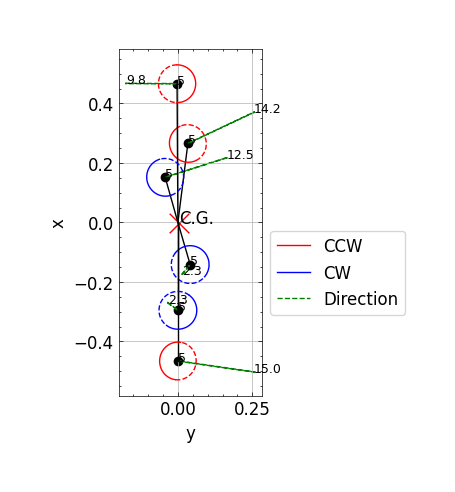

In [16]:
# Plot max ctrl drone
ctrl_max = objectives_optim.iloc[objectives_optim['ctrl'].idxmax()]["drone"]
ctrl_drone = Phenotype(ctrl_max)
ctrl_drone.plot_drone(quiver=True)